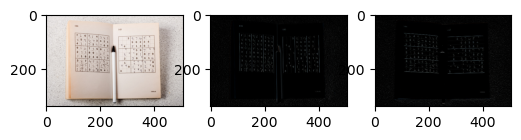

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('./images/sudoku.jpg')
img = img[...,::-1]

kernel_gx = np.array([[-1,1]])
kernel_gy = np.array([
    [-1],
    [1]
])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, dpi=100)
ax1.imshow(img)
ax2.imshow(edge_gx)
ax3.imshow(edge_gy)

SyntaxError: invalid syntax (Temp/ipykernel_12744/1762342960.py, line 3)

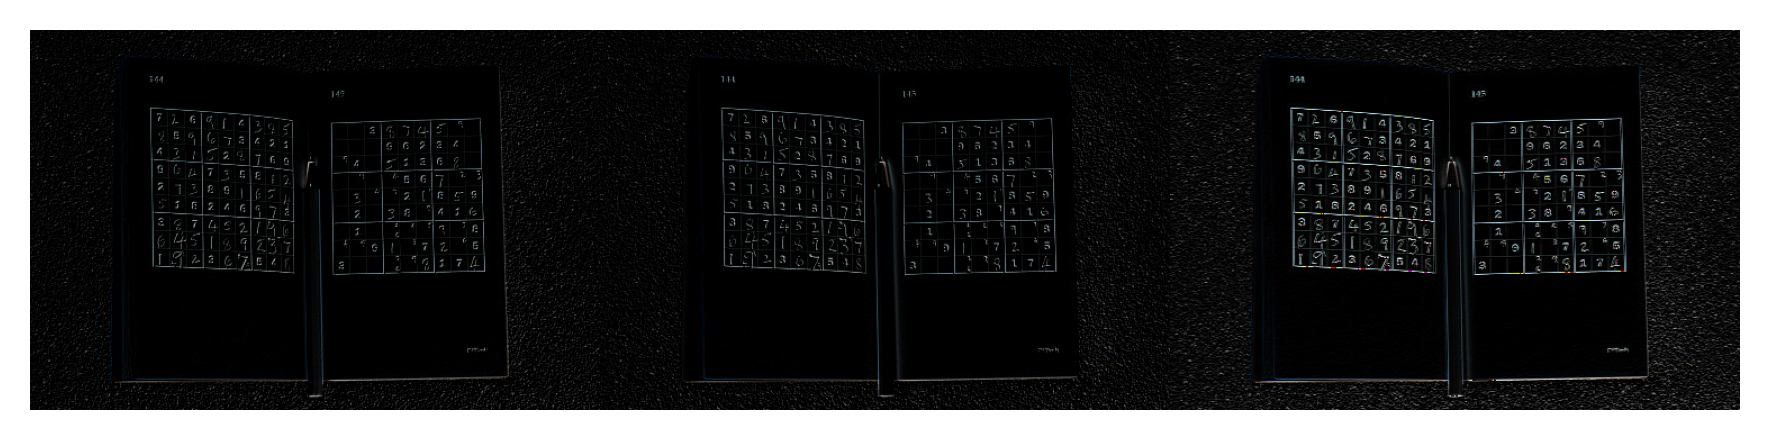

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('./images/sudoku.jpg')
img = img[...,::-1]

kernel_gx = np.array([
    [1,0], [0, -1]
])
kernel_gy = np.array([
    [0,1], [-1, 0]
])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, ax = plt.subplots(dpi=300)
merged = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
ax.imshow(merged)
ax.axis('off')
fig.tight_layout()
plt.show()

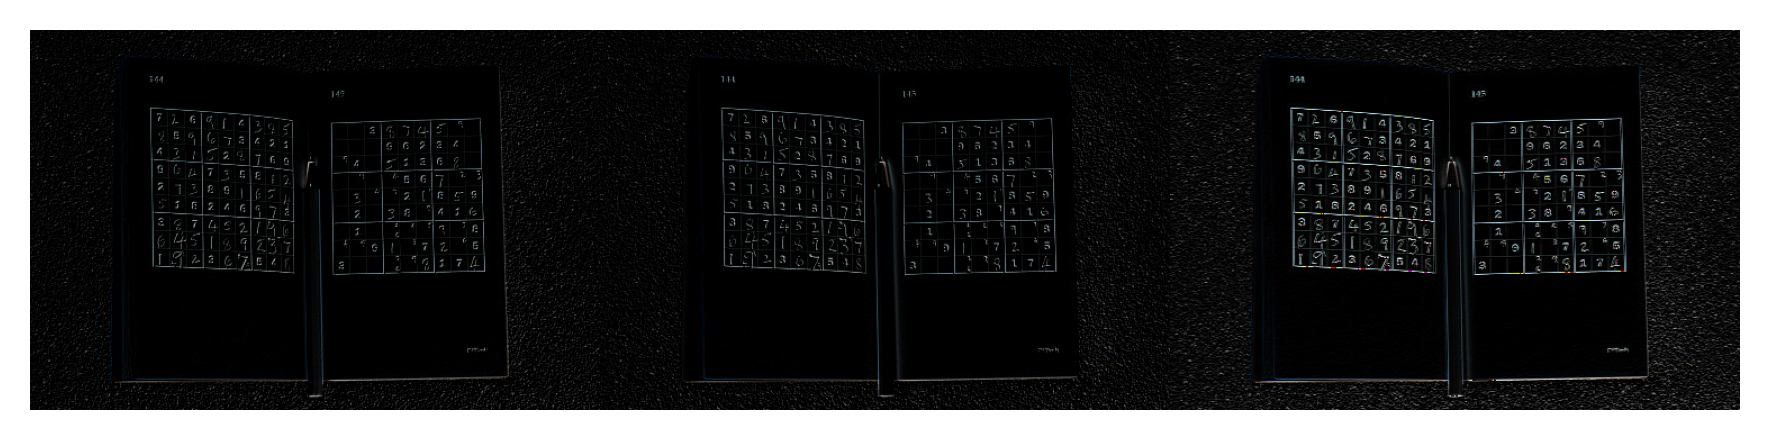

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('./images/sudoku.jpg')
img = img[...,::-1]

kernel_gx = np.array([
    [1,0], [0, -1]
])
kernel_gy = np.array([
    [0,1], [-1, 0]
])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, ax = plt.subplots(dpi=300)
merged = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
ax.imshow(merged)
ax.axis('off')
fig.tight_layout()
plt.show()

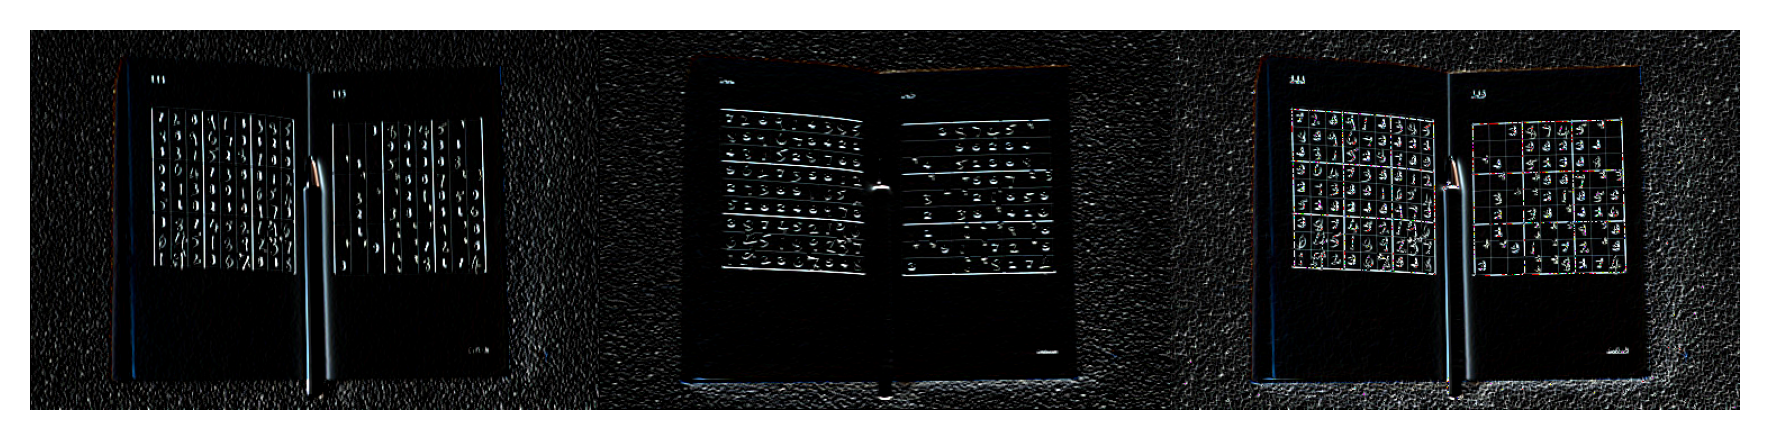

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg')
img = img[..., ::-1]

kernel_gx = np.array([
    [-1, 0, 1], 
    [-1, 0, 1], 
    [-1, 0, 1]
])
kernel_gy = np.array([
    [-1, -1, -1], 
    [0, 0, 0], 
    [1, 1, 1]
])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

fig, ax = plt.subplots(dpi=300)
merged = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
ax.imshow(merged)
ax.axis('off')
fig.tight_layout()
plt.show()

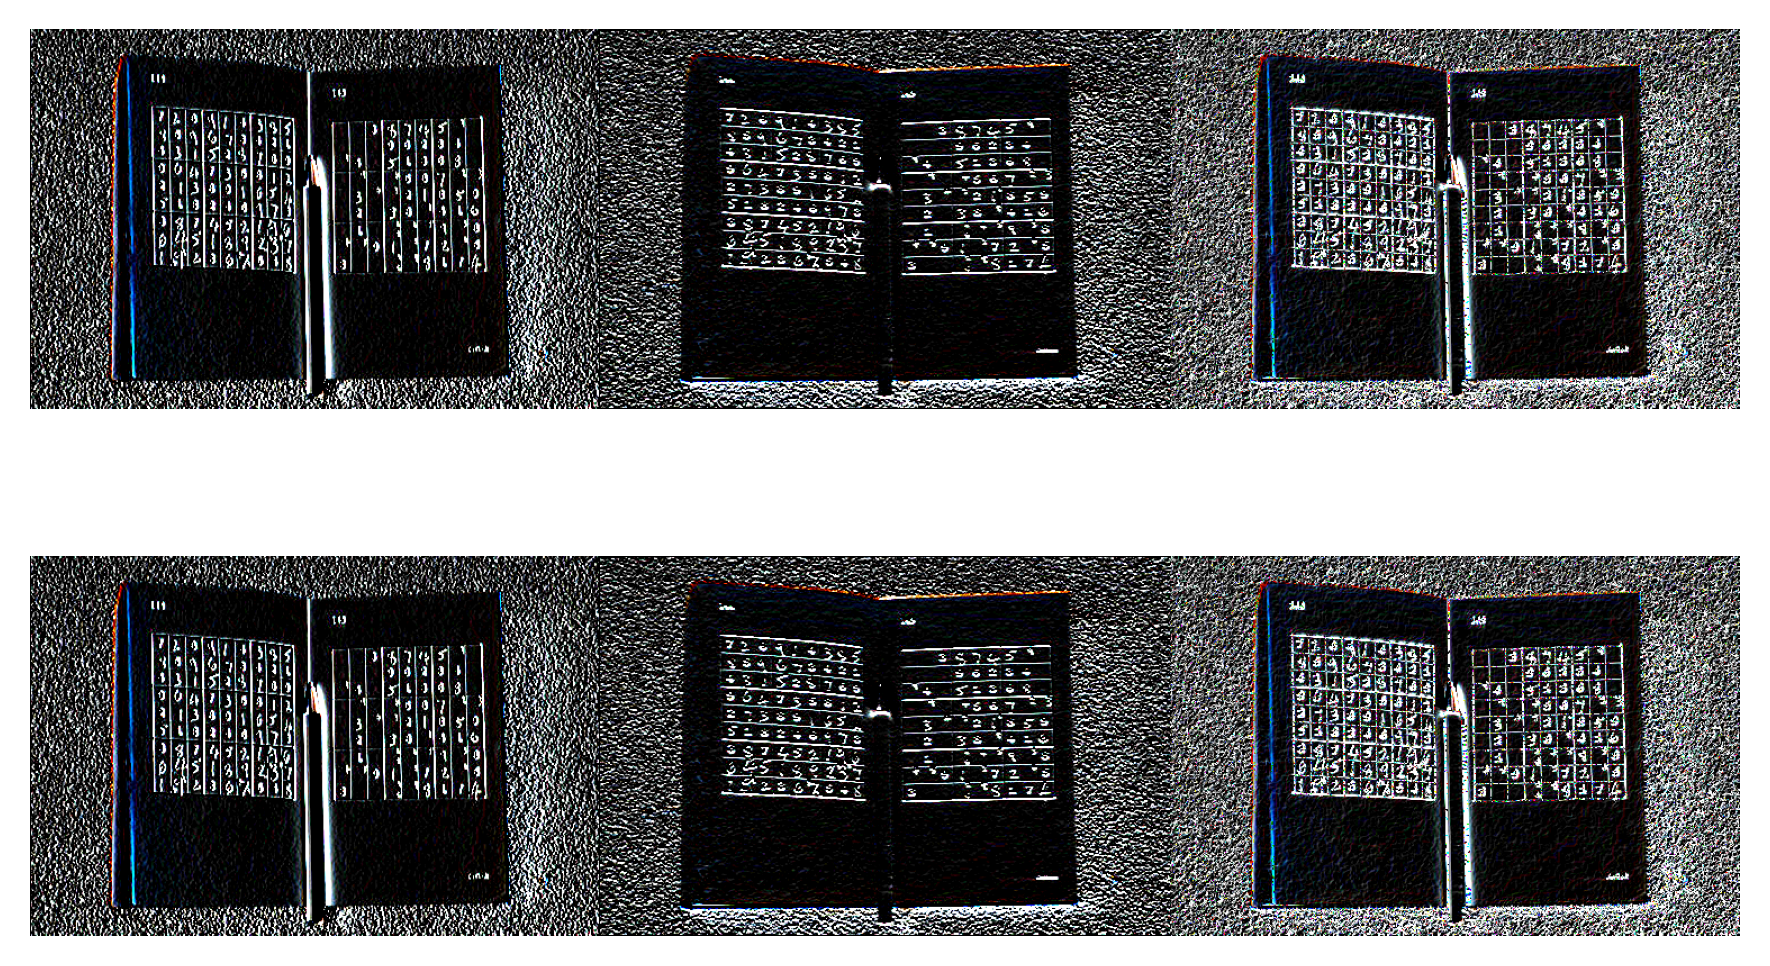

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg')
img = img[..., ::-1]

kernel_gx = np.array([
    [-3, 0, 3], 
    [-10, 0, 10], 
    [-3, 0, 3]
])
kernel_gy = np.array([
    [-3, -10, -3], 
    [0, 0, 0],
    [3, 10, 3]
])

edge_gx = cv2.filter2D(img, -1, kernel_gx)
edge_gy = cv2.filter2D(img, -1, kernel_gy)

sobel_x = cv2.Scharr(img, -1, 1, 0)
sobel_y = cv2.Scharr(img, -1, 0, 1)

fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300)
merged1 = np.hstack((edge_gx, edge_gy, edge_gx + edge_gy))
merged2 = np.hstack((sobel_x, sobel_y, sobel_x + sobel_y))
ax1.imshow(merged1)
ax1.axis('off')
ax2.imshow(merged2)
ax2.axis('off')
fig.tight_layout()
plt.show()

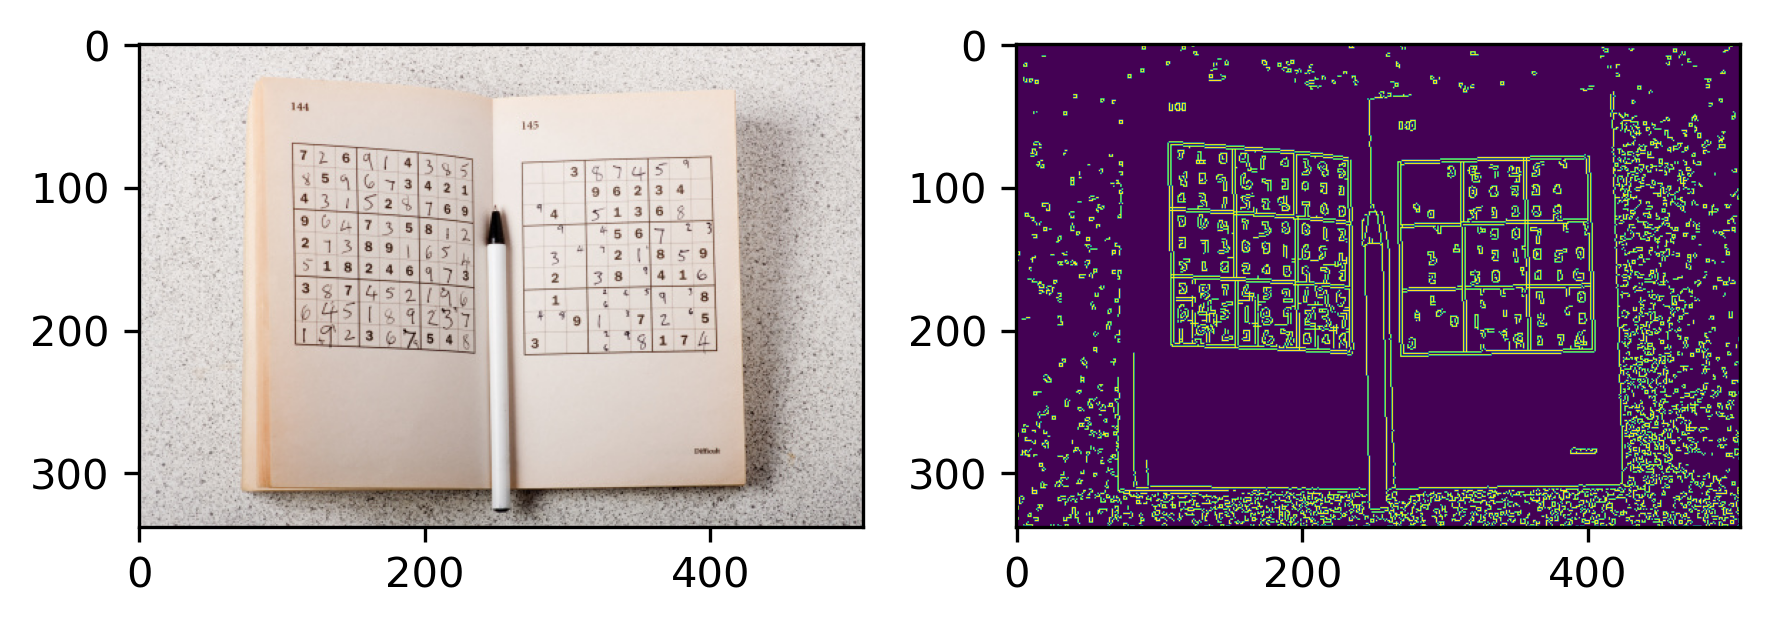

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg')
img = img[..., ::-1]

edge = cv2.Canny(img, 100, 200)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=300)
ax1.imshow(img)
ax2.imshow(edge)
fig.tight_layout()
plt.show()

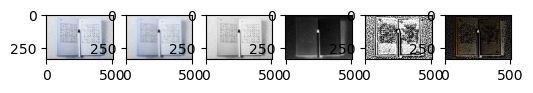

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg')
w, h, _ = img.shape

img_color = np.copy(img)
for _ in range(2):
    img_color = cv2.pyrDown(img_color)

for _ in range(2):
    img_color = cv2.bilateralFilter(
        img_color,
        d=9,
        sigmaColor=0.1,
        sigmaSpace=0.01
    )

for _ in range(2):
    img_color = cv2.pyrUp(img_color)
    
img_color = cv2.resize(img_color, (img.shape[1], img.shape[0]))

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(
    (img_gray*255).astype(np.uint8),7
)

img_edge = cv2.adaptiveThreshold(
    (img_blur*255).astype(np.uint8),
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    blockSize=11,
    C=0
)

img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and((255*img_color).astype(np.uint8),img_edge)
    
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6, dpi=100)
ax1.imshow(img)
ax2.imshow(img_color)
ax3.imshow(img_gray, cmap='gray')
ax4.imshow(img_blur, cmap='gray')
ax5.imshow(img_edge)
ax6.imshow(img_cartoon)
plt.show()

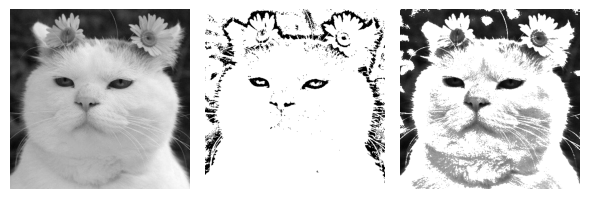

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, img_as_float, filters

img = io.imread('./images/cat-01.jpg')
img = color.rgb2gray(img)

def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))
            
def sketch(img, edges):
    output = np.multiply(img, edges)
    output[output > 1] = 1
    output[edges == 1] = 1
    return output
            
def edges_with_dodge2(img):
    img_blurred = filters.gaussian(util.invert(img), sigma=5)
    output = np.divide(img,util.invert(img_blurred) + 0.001)
    output = normalize(output)
    thresh = filters.threshold_otsu(output)
    output = output > thresh
    return output

def edges_with_dodge(img):
    original = img.copy()
    blur = filters.gaussian(util.invert(img), sigma=20)
    output = blur / util.invert(original)
    output[output>1]=1
    output[original == 1] = 1
    return output

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, dpi=100)
ax1.imshow(img, cmap='gray')
ax1.axis('off')
ax2.imshow(sketch(img, edges_with_dodge2(img)),cmap='gray')
ax2.axis('off')
ax3.imshow(sketch(img, edges_with_dodge(img)),cmap='gray')
ax3.axis('off')
fig.tight_layout()
plt.show()

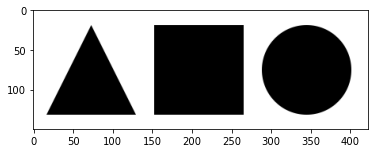

도형의 갯수 : 3, 3


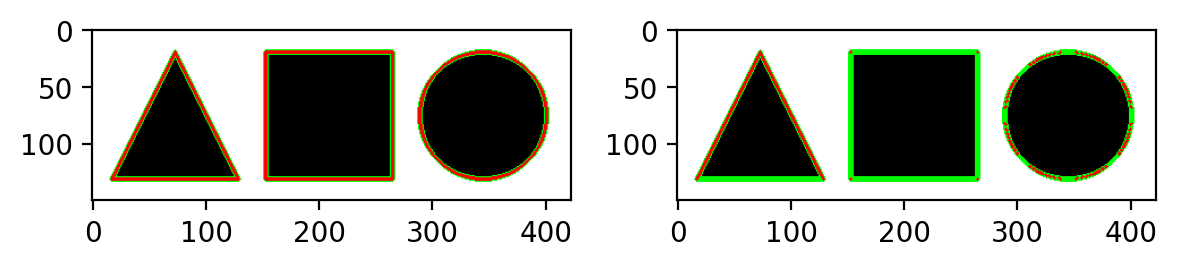

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/shapes.png')
plt.imshow(img, cmap='gray')
plt.show()
img2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

contour, hierarchy = cv2.findContours(
    img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)
contour2, hierarchy = cv2.findContours(
    img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
print(f'도형의 갯수 : {len(contour)}, {len(contour2)}')

cv2.drawContours(img, contour, -1, (0,255,0),4)
cv2.drawContours(img2, contour2, -1, (0,255,0),4)

for i in contour:
    for j in i:
        cv2.circle(img, tuple(j[0]),1,(255,0,0),-1)

for i in contour2:
    for j in i:
        cv2.circle(img2, tuple(j[0]),1,(255,0,0),-1)
        
fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=200)
ax1.imshow(img)
ax2.imshow(img2)
fig.tight_layout()
plt.show()
        